In [130]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat

#### Data

In [131]:
data = loadmat('digits.mat')
X = data['X']
y = data['y']
m,n = X.shape
for i in range(m):
    if y[i]==10:
        y[i]=0

#### Data visualization

In [132]:
def displayData():
    r = random.randint(0,5000)
    plt.imshow(np.reshape(X[r], (20,20)).T, cmap=cm.gray)
    plt.title(y[r])

/home/naz/.local/lib/python3.6/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


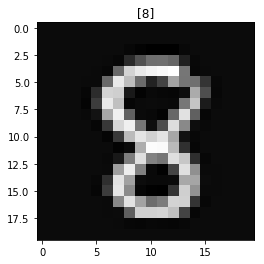

In [133]:
displayData()

#### Hypothesis and cost fucntions

In [144]:
h = np.zeros((m,1))
theta = np.zeros(n)
def hypothesis(theta):
    h = 1.0/(1.0+np.exp(-np.dot(X,theta.T)))
    for i in range(m):
        if h[i]>0.5 or h[i]==0.5:
            h[i]=1
        else:
            h[i]=0
    return h
h.shape

(5000, 1)

In [145]:
def cost():
    h = sigmoid(hypothesis(theta))
    J = np.sum(np.dot(-y.T, np.log(h)) - np.dot((1-y).T, np.log(1-h)))
    return J
cost()

967968.8124352583

#### Gradient descent algorithm

In [151]:
alpha = 0.001
def gradient(alpha, theta, y):
    for i in range(2000):
        h = hypothesis(theta).reshape(m,1)
        theta =theta - (alpha/m)*np.dot((h-y).T, X)
    return theta
#theta = gradient(alpha, theta,y)

#### One vs all classification

In [152]:
pred = np.zeros((m,10))
ys = np.zeros((m,1))
yy = np.zeros((m,1))
from sklearn.metrics import accuracy_score
for i in range(10):
    for j in range(m):
        if y[j]==i:
            yy[j]=1
        else:
            yy[j]=0
    theta = gradient(alpha, theta, yy)
    pred[:,i] = hypothesis(theta).ravel()
for i in range(m):
    for j in range(10):
        if pred[i,j]==1:
            ys[i]=j
ys,y   

(array([[0.],
        [0.],
        [0.],
        ...,
        [9.],
        [9.],
        [9.]]), array([[0],
        [0],
        [0],
        ...,
        [9],
        [9],
        [9]], dtype=uint8))

#### Calculate accuracy

In [153]:
print('Accuracy is about ',accuracy_score(ys, y),'%')

Accuracy is about  0.8366 %
